## 1. Business understanding

## 2. Data understanding

In [85]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# fetch dataset
phishing_websites = fetch_ucirepo(id=327)

# data (as pandas dataframes)
df = phishing_websites.data.original

df.head(10)

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


## 3. Data preparing

In [86]:
X = df.drop(columns={'result'})
y = df['result']

## 4. Modeling

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7738, 30) (3317, 30) (7738,) (3317,)


In [88]:
for d in range (1,11):
    model = DecisionTreeClassifier(max_depth=d, random_state=20)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f'for max depth = {d} the accuracy is: {accuracy_test:.4f}  \n {cm}')

for max depth = 1 the accuracy is: 0.8897  
 [[1264  198]
 [ 168 1687]]
for max depth = 2 the accuracy is: 0.9065  
 [[1326  136]
 [ 174 1681]]
for max depth = 3 the accuracy is: 0.9074  
 [[1326  136]
 [ 171 1684]]
for max depth = 4 the accuracy is: 0.9171  
 [[1325  137]
 [ 138 1717]]
for max depth = 5 the accuracy is: 0.9252  
 [[1276  186]
 [  62 1793]]
for max depth = 6 the accuracy is: 0.9343  
 [[1358  104]
 [ 114 1741]]
for max depth = 7 the accuracy is: 0.9388  
 [[1361  101]
 [ 102 1753]]
for max depth = 8 the accuracy is: 0.9373  
 [[1370   92]
 [ 116 1739]]
for max depth = 9 the accuracy is: 0.9463  
 [[1394   68]
 [ 110 1745]]
for max depth = 10 the accuracy is: 0.9506  
 [[1394   68]
 [  96 1759]]


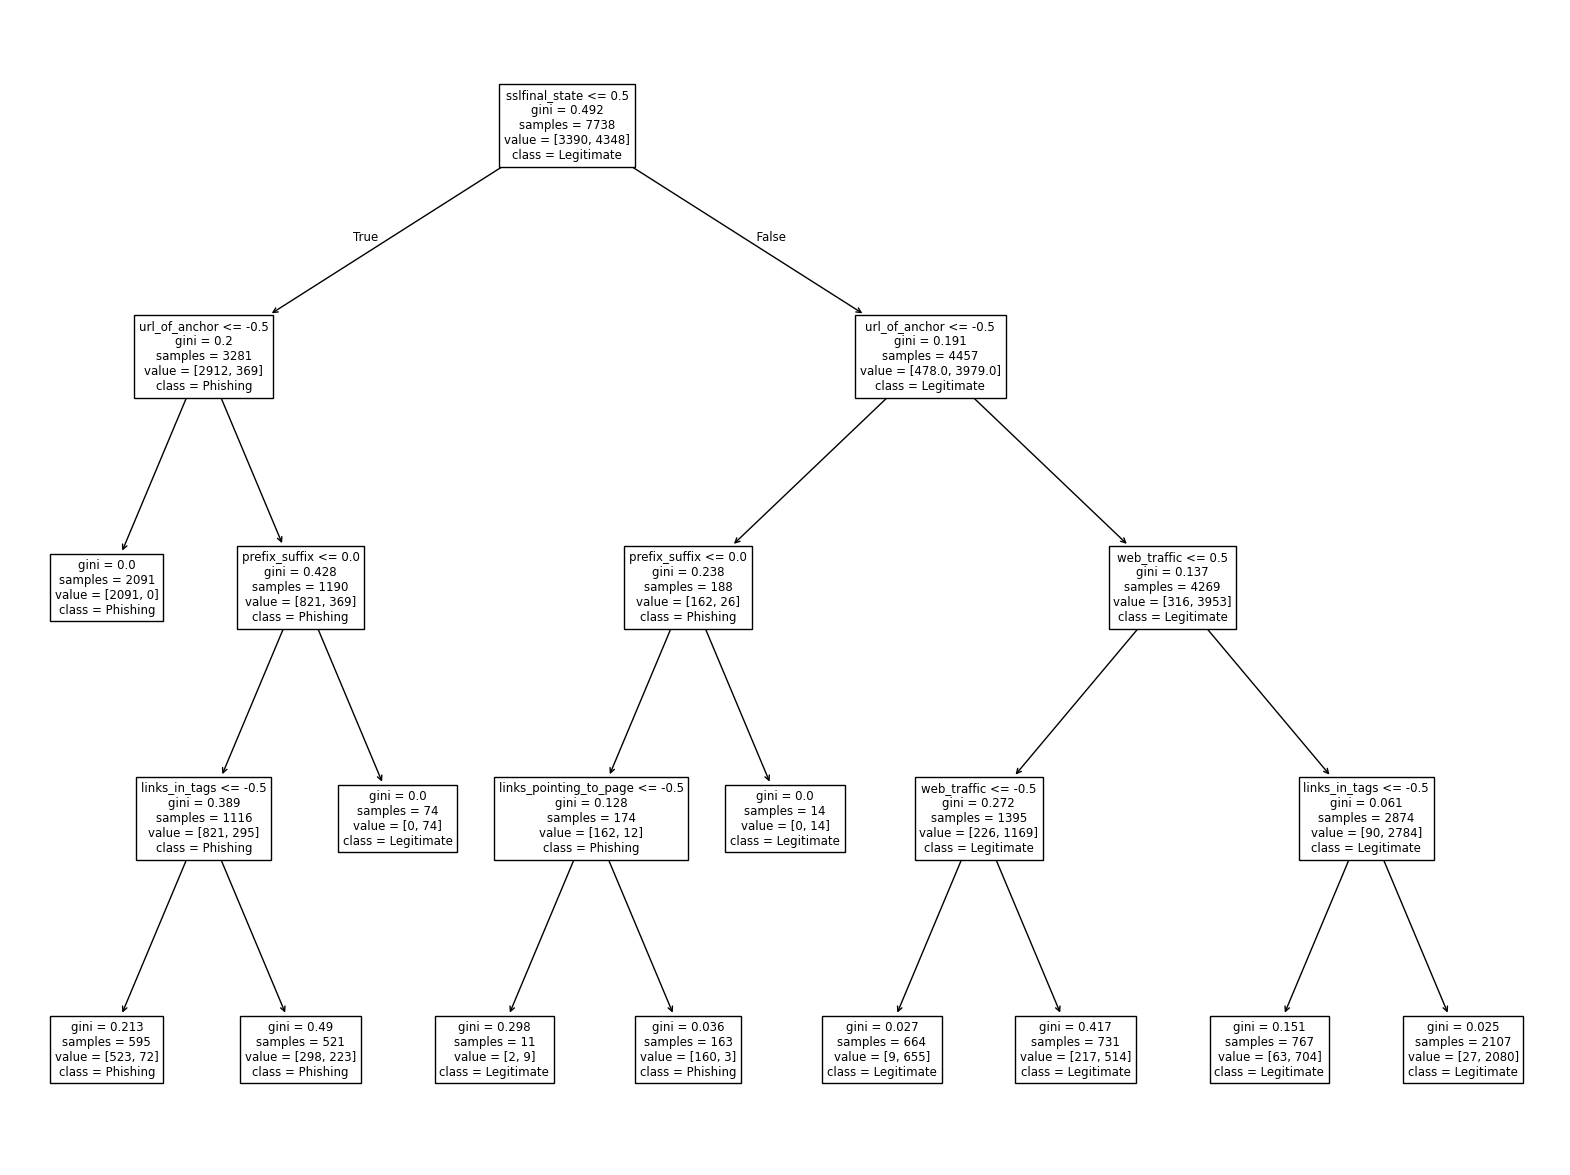

In [107]:
model = DecisionTreeClassifier(max_depth=4, random_state=20)
model.fit(X_train, y_train)
fig = plt.figure(figsize= (20, 15))
plot_tree(model, feature_names=X.keys(), class_names= ['Phishing', 'Legitimate'])
plt.show()

In [108]:
preds = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
print("Classification Report:\n", classification_report(y_test, preds))

Accuracy: 0.9119686463671993
Confusion Matrix:
 [[1351  157]
 [ 135 1674]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.91      0.90      0.90      1508
           1       0.91      0.93      0.92      1809

    accuracy                           0.91      3317
   macro avg       0.91      0.91      0.91      3317
weighted avg       0.91      0.91      0.91      3317



In [113]:
X = df.drop(columns={'result'})
y = df['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)


In [114]:
model = RandomForestClassifier(n_estimators=50, max_depth=4, bootstrap=True, max_samples=0.7, max_features=0.75, random_state=20)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",50
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",0.75
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_tru

In [115]:
y_pred = model.predict(X_test)
print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
print(model.feature_importances_)

Confusion matrix:
[[1325  137]
 [ 139 1716]]
              precision    recall  f1-score   support

          -1       0.91      0.91      0.91      1462
           1       0.93      0.93      0.93      1855

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317

[5.09235333e-05 0.00000000e+00 2.87842689e-04 0.00000000e+00
 0.00000000e+00 2.72178840e-02 5.38297335e-03 6.58161488e-01
 2.25185202e-03 6.14424110e-05 4.35671104e-05 0.00000000e+00
 1.79707328e-03 2.50214979e-01 2.21666168e-02 1.15988210e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.76912506e-05
 0.00000000e+00 0.00000000e+00 1.92186275e-07 0.00000000e+00
 0.00000000e+00 2.90701245e-02 0.00000000e+00 1.58128437e-04
 1.91733998e-03 0.00000000e+00]


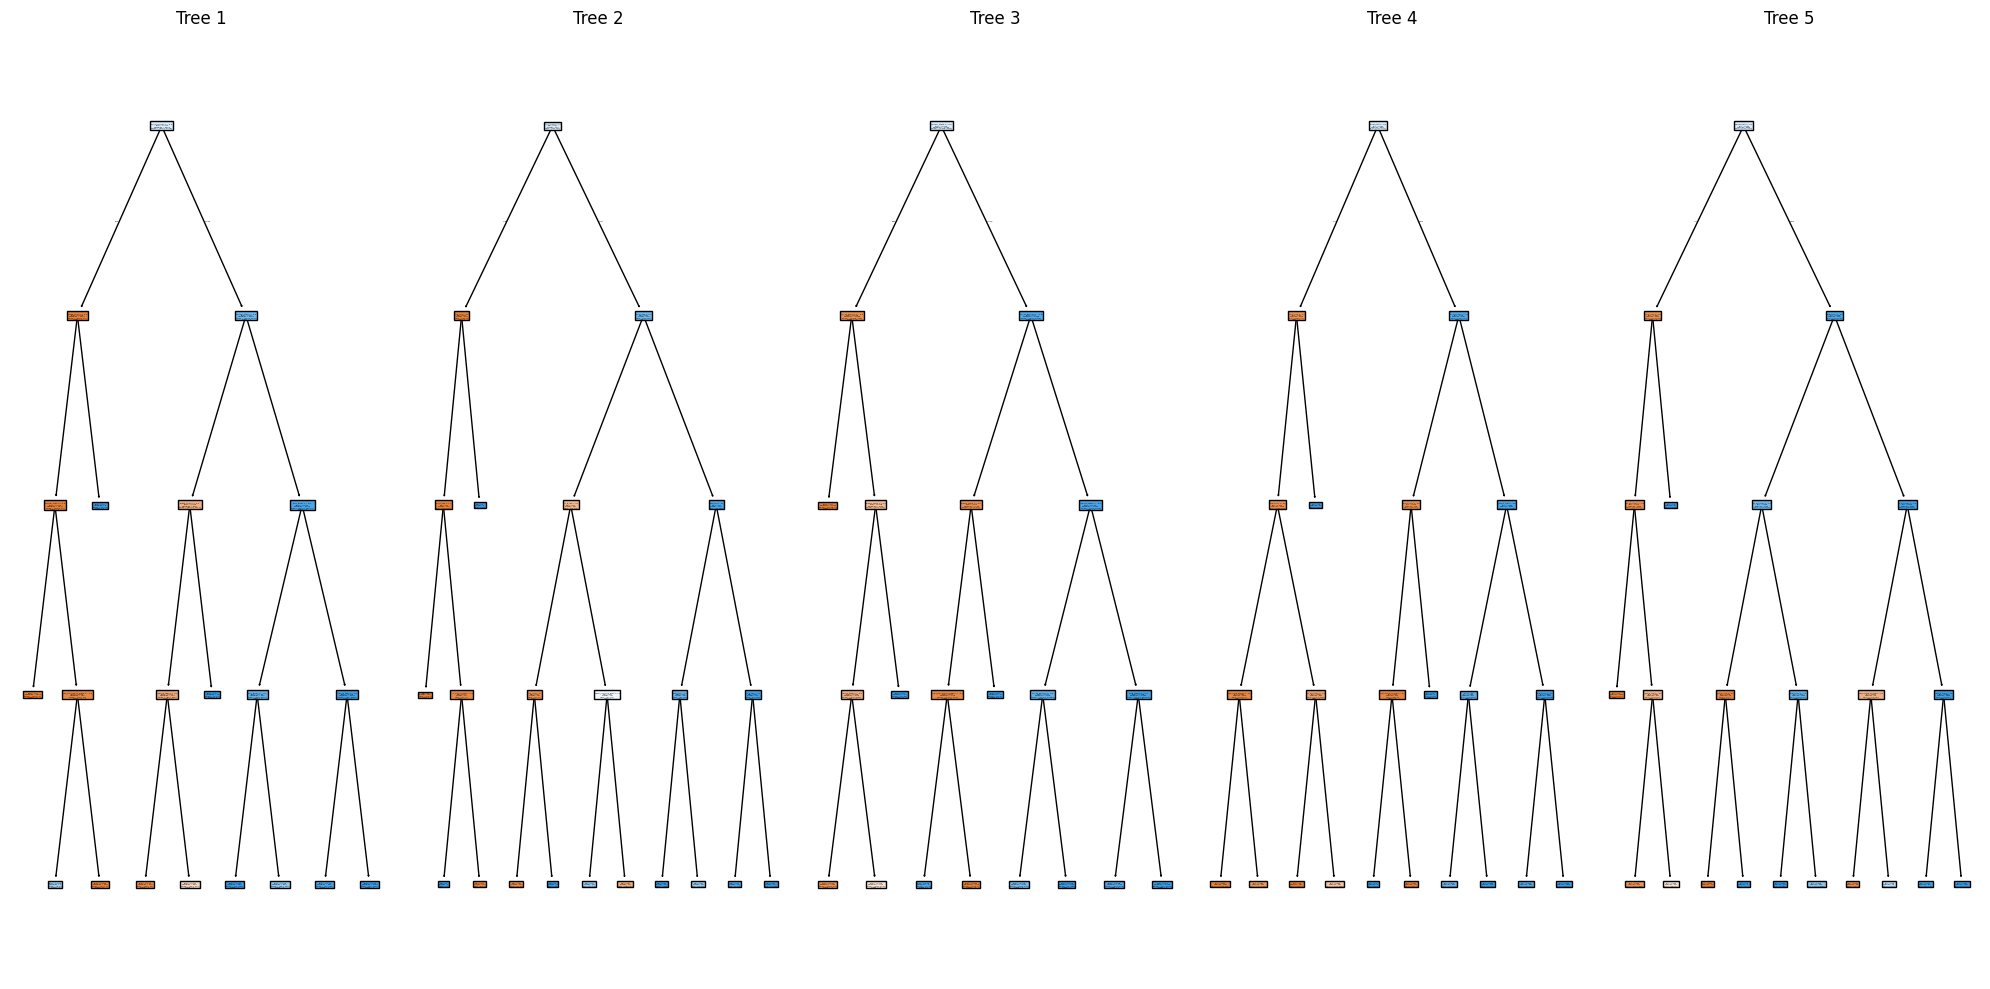

In [118]:
random_forest_model = RandomForestClassifier(n_estimators=50, max_depth=4, bootstrap=True, max_samples=0.7, max_features=0.75, random_state=20)
random_forest_model.fit(X, y)

# Number of trees to plot
n_trees_to_plot = 5

plt.figure(figsize=(20, 10))

for i in range(n_trees_to_plot):
    plt.subplot(1, n_trees_to_plot, i + 1)  # 1 row and n_trees_to_plot columns
    plot_tree(random_forest_model.estimators_[i], filled=True,
              feature_names= X.keys(), class_names=['-1', '1'])
    plt.title(f'Tree {i + 1}')

plt.tight_layout()
plt.show()

from sklearn.tree import export_text
assignment3_tree = export_text(random_forest_model.estimators_[0], feature_names=X.keys().tolist())
with open('assignment3_tree.txt', 'w') as f:
    f.write(assignment3_tree)

In [119]:
preds = random_forest_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
print("Classification Report:\n", classification_report(y_test, preds))

Accuracy: 0.9176967138981007
Confusion Matrix:
 [[1325  137]
 [ 136 1719]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.91      0.91      0.91      1462
           1       0.93      0.93      0.93      1855

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



## 5. Evaluation

## 6. Deployment